# A1 Data Curation

The purpose of this notebook is to make my project reproducible by others in research, and in particular, to collect and analyze the data about English Wikipedia page traffic from January 1 2008 to September 30 2020.

## Step 1: Gathering the data

I used two different Wikimedia REST API endpoints for gathering the data:

1. The Legacy Pagecounts API: [documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts), [endpoints](https://wikimedia.org/api/rest_v1/#/Pagecounts_data_(legacy)/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end)

2. The Pageviews API: [documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews), [endpoints](https://wikimedia.org/api/rest_v1/#/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end)

In addition, I followed this [example notebook](https://public.paws.wmcloud.org/User:Jtmorgan/data512_a1_example.ipynb) that contains sample code for API calls. 

In [19]:
import json
import requests

In [27]:
# set the endpoint links
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [28]:
# set the parameters for getting aggregated legacy view data 
params_legacy_desktop = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

params_legacy_mobile = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

# set the parameters for getting aggregated current standard pageview data
params_pageviews_desktop = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : "2020100100"
                        }

params_pageviews_mobile_web = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : "2020100100"
                        }

params_pageviews_mobile_app = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : "2020100100"
                        }
# customize these with my own information
headers = {
    'User-Agent': 'https://github.com/mshhh',
    'From': 'simiao@uw.edu'
}

In [29]:
# write a funtion to call the API 
def api_call(endpoint, parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [30]:
# get these endpoint data 
pagecounts_desktop_site = api_call(endpoint_legacy, params_legacy_desktop)

pagecounts_mobile_site = api_call(endpoint_legacy, params_legacy_mobile)

pageviews_desktop = api_call(endpoint_pageviews, params_pageviews_desktop)

pageviews_mobile_web = api_call(endpoint_pageviews, params_pageviews_mobile_web)

pageviews_mobile_app = api_call(endpoint_pageviews, params_pageviews_mobile_app)

I saved all data source files in json named as *apiname_accesstype_firstmonth-lastmonth.json*.

In [32]:
with open('pagecounts_desktop-site_200801-201607.json', 'w') as json_out_file1:
    json.dump(pagecounts_desktop_site, json_out_file1)

In [33]:
with open('pagecounts_mobile-site_200801-201607.json', 'w') as json_out_file2:
    json.dump(pagecounts_mobile_site, json_out_file2)

In [34]:
with open('pageviews_desktop_201507-202009.json', 'w') as json_out_file3:
    json.dump(pageviews_desktop, json_out_file3)

In [35]:
with open('pageviews_mobile-web_201507-202009.json', 'w') as json_out_file4:
    json.dump(pageviews_mobile_web, json_out_file4)

In [36]:
with open('pageviews_mobile-app_201507-202009.json', 'w') as json_out_file5:
    json.dump(pageviews_mobile_app, json_out_file5)

## Step2: Processing the data

In [52]:
import pandas as pd
from pandas.io.json import json_normalize

I processed the data by using the [json_normalize](https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.io.json.json_normalize.html) package. It helps quickly normalize semi-structured JSON data into a flat table.

In [45]:
# get the dataframe for each json file 
pagecounts_desktop_site_df = json_normalize(pagecounts_desktop_site['items'])
pagecounts_desktop_site_df = pagecounts_desktop_site_df.rename(columns={'count' : 'pagecount_desktop_views'})
pagecounts_mobile_site_df = json_normalize(pagecounts_mobile_site['items'])
pagecounts_mobile_site_df = pagecounts_mobile_site_df.rename(columns={'count' : 'pagecount_mobile_views'})

pageviews_desktop_df = json_normalize(pageviews_desktop['items'])
pageviews_desktop_df = pageviews_desktop_df.rename(columns={'views' : 'pageview_desktop_views'})
pageviews_mobile_web_df = json_normalize(pageviews_mobile_web['items'])
pageviews_mobile_web_df = pageviews_mobile_web_df.rename(columns={'views' : 'pageviews_mobile_web_views'})
pageviews_mobile_app_df = json_normalize(pageviews_mobile_app['items'])
pageviews_mobile_app_df = pageviews_mobile_app_df.rename(columns={'views' : 'pageviews_mobile_app_views'})

In [47]:
# drop the columns that we don't want to display at the end
pagecounts_desktop_site_df = pagecounts_desktop_site_df.drop(columns=["project", "granularity", "access-site"])
pagecounts_mobile_site_df = pagecounts_mobile_site_df.drop(columns=["project", "granularity", "access-site"])
pageviews_desktop_df = pageviews_desktop_df.drop(columns=["project", "granularity", "agent", "access"])
pageviews_mobile_web_df = pageviews_mobile_web_df.drop(columns=["project", "granularity", "agent", "access"])
pageviews_mobile_app_df = pageviews_mobile_app_df.drop(columns=["project", "granularity", "agent", "access"])

In [54]:
# merge the dataframes on the timestamp 
traffic_df = pd.merge(pagecounts_desktop_site_df, pagecounts_mobile_site_df, on='timestamp', how='outer')
traffic_df = pd.merge(traffic_df, pageviews_desktop_df, on='timestamp', how='outer')
traffic_df = pd.merge(traffic_df, pageviews_mobile_web_df, on='timestamp', how='outer')
traffic_df = pd.merge(traffic_df, pageviews_mobile_app_df, on='timestamp', how='outer')

In [57]:
# fill the none value with 0
traffic_df = traffic_df.fillna(0)

In [84]:
# seperate the timestamp column into year and month columns
# combine the pageview mobile web and mobile app into pageview mobile views 
# set all column names followed by the name convention
final_file_df = pd.DataFrame()
final_file_df['year'] = traffic_df['timestamp'].str.slice(0, 4) 
final_file_df['month'] = traffic_df['timestamp'].str.slice(4, 6) 
final_file_df['pagecount_all_views'] = traffic_df['pagecount_desktop_views'] + traffic_df['pagecount_mobile_views']
final_file_df['pagecount_desktop_views'] = traffic_df['pagecount_desktop_views']
final_file_df['pagecount_mobile_views'] = traffic_df['pagecount_mobile_views']
final_file_df['pageview_all_views'] = traffic_df['pageview_desktop_views'] + traffic_df['pageviews_mobile_web_views'] + traffic_df['pageviews_mobile_app_views']
final_file_df['pageview_desktop_views'] = traffic_df['pageview_desktop_views']
final_file_df['pageview_mobile_views'] = traffic_df['pageviews_mobile_web_views'] + traffic_df['pageviews_mobile_app_views']

In [61]:
# save the final data file in csv
final_file_df.to_csv('en-wikipedia_traffic_200801-202009.csv', index=False)

## Step 3: Analyze the data

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

I converted the date column back to datetime format and scale the data by dividing 1e6. Also, I replaced the zero value with none value just for plotting the graph. 

In [85]:
final_file_df['date'] = final_file_df.apply(lambda r: pd.datetime(int(r.year), int(r.month), 1), axis=1)
for column in ['pagecount_all_views', 'pagecount_desktop_views', 'pagecount_mobile_views', 'pageview_all_views', 
               'pageview_desktop_views', 'pageview_mobile_views']:
    final_file_df[column] = final_file_df[column] / 1e6
final_file_df = final_file_df.replace(to_replace=0, value=pd.np.nan)
final_file_df = final_file_df.sort_values('date')

Text(0.5, 1.0, 'Page Views on English Wikipedia (x 1,000,000)')

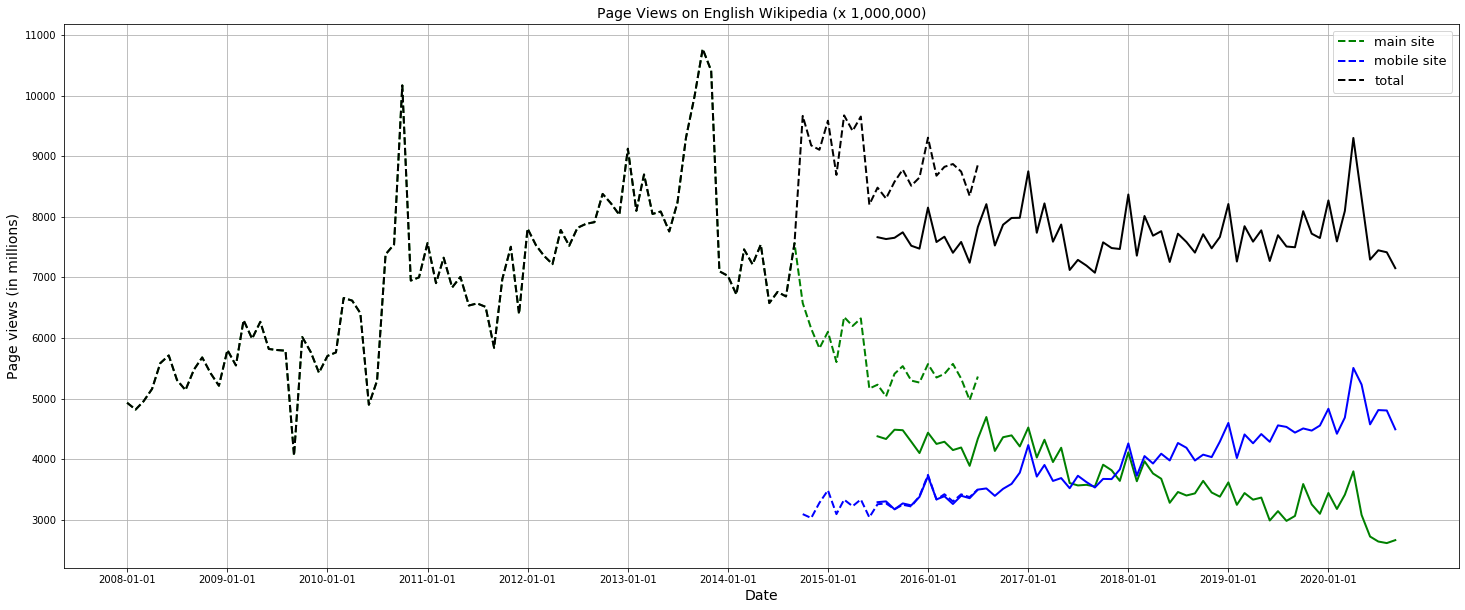

In [104]:
# set the figure size
plt.figure(figsize=(25, 10))

# plot the main site traffic
plt.plot('date', 'pagecount_desktop_views', data=final_file_df, color='green', linewidth=2, linestyle='dashed', label="main site")
plt.plot('date', 'pageview_desktop_views', data=final_file_df, color='green', linewidth=2, label="")

# plot the mobile site traffic
plt.plot('date', 'pagecount_mobile_views', data=final_file_df, color='blue', linewidth=2, linestyle='dashed', label="mobile site")
plt.plot('date', 'pageview_mobile_views', data=final_file_df, color='blue', linewidth=2, label="")

# plot the total traffic
plt.plot('date', 'pagecount_all_views', data=final_file_df, color='black', linewidth=2, linestyle='dashed', label="total")
plt.plot('date', 'pageview_all_views', data=final_file_df, color='black', linewidth=2, label="")

# plot the grid 
plt.grid(True)

# set the x tick to be each year 
plt.xticks(final_file_df['year'].unique())

# plot the legend
plt.legend(prop={'size':13})

# set the title and the axis label
plt.xlabel('Date', fontsize=14)
plt.ylabel('Page views (in millions)', fontsize=14)
plt.title('Page Views on English Wikipedia (x 1,000,000)', fontsize=14)

There was a new pageview definition starting from May 2015 that excludes all spiders/crawlers. The solid line represents the new definition.

In [106]:
# save the figure
plt.savefig('en-wikipedia_traffic_200801-202009.png')

<Figure size 1440x720 with 0 Axes>

I also checked the Python version and mentioned it in the note section in the README file just in case someone needs this. 

In [18]:
from platform import python_version

print(python_version())

3.7.4
